In [1]:
# Load extensions
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Importeren van bibliotheken
import math
import numpy as np
import matplotlib.pyplot as plt

from berekeningen_ramses import Brug

# Zoeken van meest ideale parameters voor brug
## Exploratie van formules
### Probleemstelling
Berekeningen gaan uit van volgende situatie:
![Berekeningen](figures/berekeningen_andreas2.0.svg)

In [3]:
brug = Brug(3, 0.3, 2, 2, 0.1, 0.1, 3)
brug.__dict__

{'h1': 3,
 'h2': 0.3,
 'd1a': 2,
 'd2a': 2,
 'd1b': 0.1,
 'd2b': 0.1,
 'N': 3,
 'cosa': 0.5144957554275266,
 'sina': 0.8574929257125443,
 'cosb': 0.9863939238321437,
 'sinb': 0.1643989873053573}

In [4]:
brug.calc_reactie_krachten()

[102.825, 338.98333333333335, 272.31666666666666, 205.65, 102.825]

In [5]:
brug.calc_touw_kracht()

([359.38100178563195, 288.70279699962833, 218.02459221362471],
 [187.45046530869004, 150.5852378523372, 113.72001039598437])

In [6]:
brug.calc_kant()

(-196.25358851674642,
 -445.60909090909087,
 (184.89999999999998, 167.85320934689335, 162.86434106371865),
 -19.62535885167463,
 -445.6090909090907,
 (184.89999999999992, 148.7419503972279, 112.79247081372417))

### Wegdek

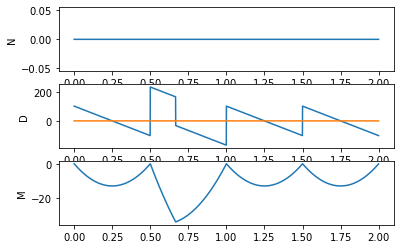

In [7]:
x = np.arange(0, 2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_wegdek(xi) for xi in x]))

plt.figure()
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2, sharex=ax1)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax2.plot(x, [0]*len(x))
ax3 = plt.subplot(3,1,3, sharex=ax1)
ax3.plot(x, [-m for m in M])
ax3.set_ylabel("M")
plt.savefig("figs/wegdek-ramses")

### Piloon 1

Text(0, 0.5, 'M')

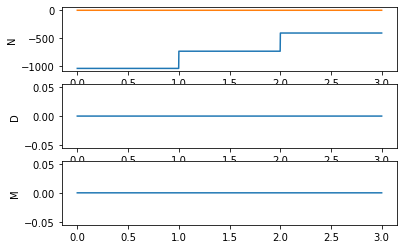

In [8]:
x = np.arange(0, brug.h1, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, True) for xi in x]))

plt.figure()
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")

### Piloon 2

Text(0, 0.5, 'M')

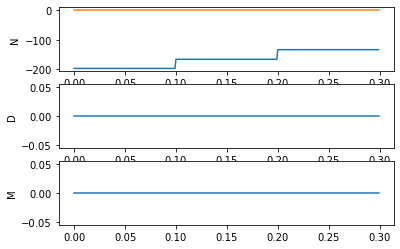

In [9]:
x = np.arange(0, brug.h2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, False) for xi in x]))

plt.figure()
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")